In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel(r'flight_data_final.xlsx')
pd.set_option('display.max_columns', None)

FileNotFoundError: [Errno 2] No such file or directory: 'flight_data_final.xlsx'

In [4]:
data.head()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Year,Return_Time,Return_Cities,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,timestamp,sort,Price
0,15/5/2021,15.0,Saturday,May,2021.0,05:25–21:45,AMD,SpiceJet,25/5/2021,25.0,Tuesday,May,2021.0,06:25–23:55,MAA,SpiceJet,16h 20m,17h 30m,1 stop,1 stop,BOM,BOM,20210410-1142,best,6125.0
1,15/5/2021,15.0,Saturday,May,2021.0,04:15–09:20,AMD,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,09:20–13:55,MAA,IndiGo,5h 05m,4h 35m,1 stop,1 stop,BLR,BLR,20210410-1142,best,6686.0
2,15/5/2021,15.0,Saturday,May,2021.0,18:15–22:45,AMD,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,09:00–14:20,MAA,IndiGo,4h 30m,5h 20m,1 stop,1 stop,BOM,BOM,20210410-1142,best,6686.0
3,15/5/2021,15.0,Saturday,May,2021.0,18:15–22:45,AMD,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,14:05–19:35,MAA,IndiGo,4h 30m,5h 30m,1 stop,1 stop,BOM,BOM,20210410-1142,best,6686.0
4,15/5/2021,15.0,Saturday,May,2021.0,18:15–22:45,AMD,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,13:15–18:55,MAA,IndiGo,4h 30m,5h 40m,1 stop,1 stop,BOM,BOM,20210410-1142,best,6686.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Out_Date             1113 non-null   object 
 1   Out_Day              1113 non-null   float64
 2   Out_Weekday          1113 non-null   object 
 3   Out_Month            1113 non-null   object 
 4   out_Year             1113 non-null   float64
 5   Out_Time             1157 non-null   object 
 6   Out_Cities           1157 non-null   object 
 7   Out_Airline          1157 non-null   object 
 8   Return_Date          1104 non-null   object 
 9   Return_Day           1104 non-null   float64
 10  Return_Weekday       1104 non-null   object 
 11  Return_Month         1104 non-null   object 
 12  Return_Year          1104 non-null   float64
 13  Return_Time          1157 non-null   object 
 14  Return_Cities        1157 non-null   object 
 15  Return_Airline       1157 non-null   o

In [6]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Out_Date               0
Out_Day                0
Out_Weekday            0
Out_Month              0
out_Year               0
Out_Time               0
Out_Cities             0
Out_Airline            0
Return_Date            0
Return_Day             0
Return_Weekday         0
Return_Month           0
Return_Year            0
Return_Time            0
Return_Cities          0
Return_Airline         0
Out_Travel_Time        0
Return_Travel_Time     0
Out_Journey_Type       0
Return_Journey_Type    0
Out_Stop_Cities        0
Return_Stop_Cities     0
timestamp              0
sort                   0
Price                  0
dtype: int64

##**Out year and Return Year has only 1 unique value i.e 2021**

In [9]:
data['out_Year'].unique()

array([2021.])

In [10]:
data['Return_Year'].unique()

array([2021.])

In [11]:
#Removing Columns which we dont need.

data.drop(["out_Year"], axis = 1, inplace = True)
data.drop(["Return_Year"], axis = 1, inplace = True)
data.drop(["timestamp"], axis = 1, inplace = True)

#Date Column Handling.

In [12]:
#data['Out_Date'] = pd.to_datetime(data.Out_Date, format = "%d/%m/%Y")  

data.drop(["Out_Date"], axis = 1, inplace = True)
data.drop(["Return_Date"], axis = 1, inplace = True)


#data['Return_Date'] = pd.to_datetime(data.Return_Date, format = "%d/%m/%Y") 

In [13]:
#Individual Date .
from sklearn.preprocessing import LabelEncoder

# For OUT Journey
data['Out_Day'] = pd.to_datetime(data.Out_Day  , format = "%d").dt.day
#MONTH LABEL ENCODING.
le = LabelEncoder()
data['Out_Month'] = le.fit_transform(data['Out_Month'])

# For Return journey no need
data.drop(["Out_Weekday"], axis = 1, inplace = True)
data.drop(["Return_Weekday"], axis = 1, inplace = True)
data.drop(["Return_Day"], axis = 1, inplace = True)
data.drop(["Return_Month"], axis = 1, inplace = True)



#Time Columns Handling.

##**Out Travel Time**

In [14]:
#Out_Travel_time:>>> Total Duration for Out Journey.
# Assigning and converting Out_Travel_Time column into list
duration = list(data["Out_Travel_Time"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
Duration_Hours = []
Duration_Mins = []
for i in range(len(duration)):
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from Out_Travel_time
    Duration_Mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from Out_Travel_time

In [15]:
# Adding Out_hours and Out_mins list to dataframe
#Duration for OUT
data["Duration_Hours"] = Duration_Hours
data["Duration_Mins"] = Duration_Mins

##**Return_Travel_Time**

##**Droping Out_Travel_Time & Return_Travel_Time Column**

In [16]:
data.drop(["Out_Travel_Time"], axis = 1, inplace = True)
data.drop(["Return_Travel_Time"], axis = 1, inplace = True)

##**SORT Column**

In [17]:
data.drop(["sort"], axis = 1, inplace = True)

# Out_Time & Return_Time Interval Handling.
##Splitting into Starting and Ending Time.

In [18]:
#OUT_TIME
data['Dep_Time'] = data['Out_Time'].apply(lambda x: x.split('–')[0])
data['Arr_Time'] = data['Out_Time'].apply(lambda x: x.split('–')[1])

In [20]:
#dep_time split for dep_hour and dep_min

data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

#Arr_time split for Arrival_hour and Arrival_Min

data["Arrival_hour"] = pd.to_datetime(data.Arr_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arr_Time).dt.minute


#Removing Return_Time Columns

In [21]:
#data.drop(["Out_Time"], axis = 1, inplace = True)
data.drop(["Return_Time"], axis = 1, inplace = True)
data.drop(["Dep_Time"], axis = 1, inplace = True)
data.drop(["Arr_Time"], axis = 1, inplace = True)

##Handling Categorical Data
##One can find many ways to handle categorical data. Some of them categorical data are,

##Nominal data --> data are not in any order --> OneHotEncoder is used in this case
##Ordinal data --> data are in order --> LabelEncoder is used in this case

In [22]:
data['Out_Airline'].value_counts()

IndiGo               532
GoAir                218
SpiceJet             208
Air India             64
AirAsia India         59
Vistara               17
Multiple Airlines      6
Name: Out_Airline, dtype: int64

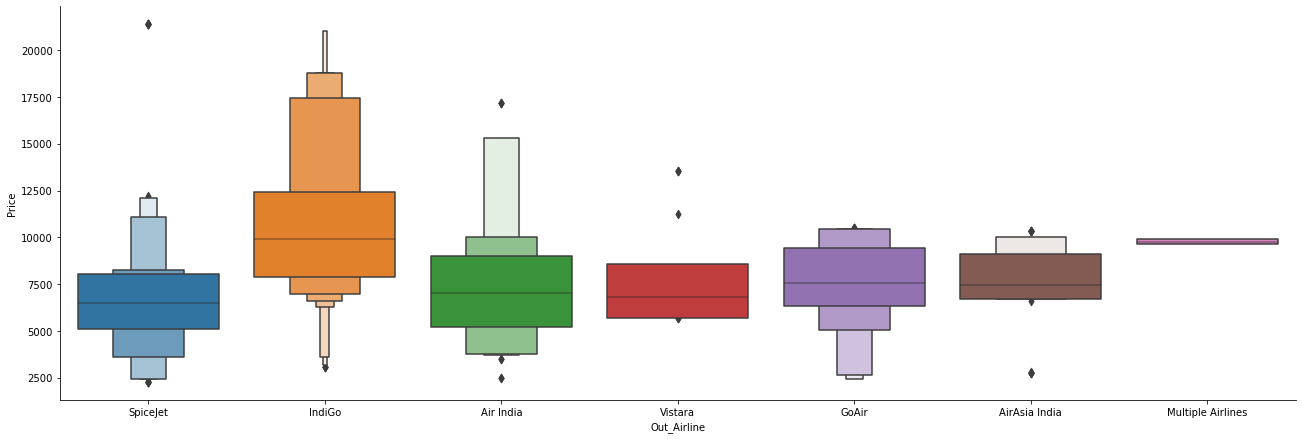

In [23]:
#Out_Airline vs price:
sns.catplot(y = "Price", x = "Out_Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [24]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Out_Airline = data[['Out_Airline']]

Out_Airline = pd.get_dummies(Out_Airline, drop_first = True)

Out_Airline.head()

,Out_Airline_AirAsia India,Out_Airline_GoAir,Out_Airline_IndiGo,Out_Airline_Multiple Airlines,Out_Airline_SpiceJet,Out_Airline_Vistara
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [25]:
#For Return_Airline

data.drop(["Return_Airline"], axis = 1, inplace = True)

#Handling Out_Cities and Return_Cities Column

In [26]:
data['Out_Cities'].value_counts()

BOM    186
CCU    180
SHL    110
MAA    101
DEL     93
BLR     67
CCJ     57
VNS     48
IXR     47
AMD     47
IXL     45
GAU     44
CNN     42
JAI     37
Name: Out_Cities, dtype: int64

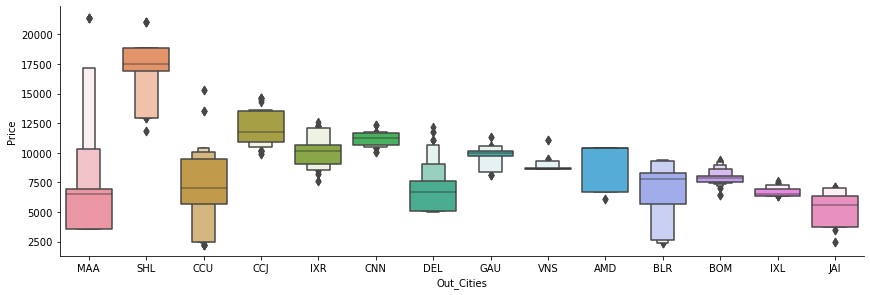

In [27]:
#Out_Cities vs Price

sns.catplot(y = "Price", x = "Out_Cities", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [28]:
#we'll perform OneHotEncoding

Out_Cities = data[['Out_Cities']]

Out_Cities = pd.get_dummies(Out_Cities, drop_first = True)

Out_Cities.head()

,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCJ,Out_Cities_CCU,Out_Cities_CNN,Out_Cities_DEL,Out_Cities_GAU,Out_Cities_IXL,Out_Cities_IXR,Out_Cities_JAI,Out_Cities_MAA,Out_Cities_SHL,Out_Cities_VNS
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
data['Return_Cities'].value_counts()

DEL    197
STV    183
MAA    114
ATQ     94
BLR     91
AMD     88
VGA     71
LKO     48
HYD     47
GAU     45
IXE     42
GOP     34
CJB     32
PAT      9
AGX      9
Name: Return_Cities, dtype: int64

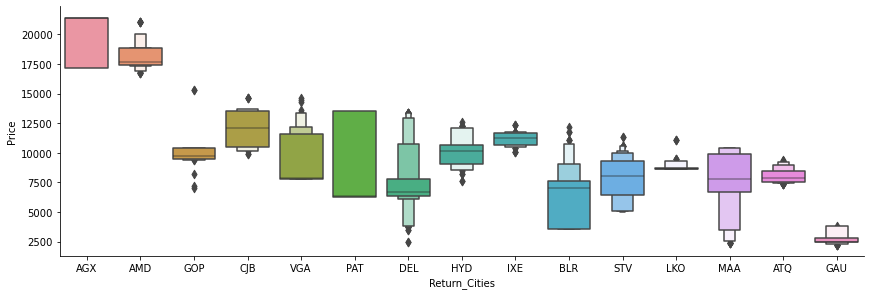

In [30]:
#Return_Cities vs Price

sns.catplot(y = "Price", x = "Return_Cities", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [31]:
Return_Cities = data[['Return_Cities']]

Return_Cities = pd.get_dummies(Return_Cities, drop_first = True)

Return_Cities.head()

,Return_Cities_AMD,Return_Cities_ATQ,Return_Cities_BLR,Return_Cities_CJB,Return_Cities_DEL,Return_Cities_GAU,Return_Cities_GOP,Return_Cities_HYD,Return_Cities_IXE,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_PAT,Return_Cities_STV,Return_Cities_VGA
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Handling Out_Stop_Cities & Return_Stop_Cities

In [32]:
#Out_Stop_Cities column Return_Stop_Cities

data.drop(["Out_Stop_Cities"], axis = 1, inplace = True)
data.drop(["Return_Stop_Cities"], axis = 1, inplace = True)


#Handling Out_Journey_Type & 	Return_Journey_Type column

In [33]:
data['Out_Journey_Type'].value_counts()

direct    643
1 stop    461
Name: Out_Journey_Type, dtype: int64

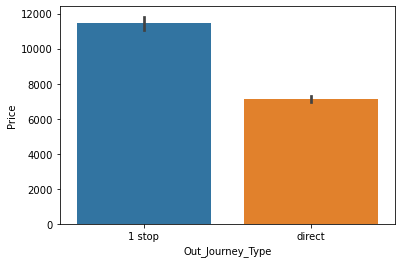

In [34]:
#Out_Journey_Type vs Price

sns.barplot(data = data, x = "Out_Journey_Type", y = "Price")
#sns.catplot(y = "Price", x = "Out_Journey_Type", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [35]:
#Label Encoding on OUT_JOURNEY_TYPE

data['Total_Stops'] = le.fit_transform(data['Out_Journey_Type'])


## Concatenate dataframe --> data + Out_Airline + 	Out_Cities + Return_Cities 

##And then Droping the Original Columns.

In [39]:
#Adding all the columns together

Clean_data = pd.concat([data, Out_Airline, Out_Cities, Return_Cities], axis = 1)

##Dropping the repeated columns

In [40]:
Clean_data.drop(['Out_Airline', 'Out_Cities', 'Return_Cities', 'Out_Time','Out_Journey_Type','Return_Journey_Type'], axis = 1, inplace = True)

In [41]:
Clean_data.head()

,Out_Day,Out_Month,Price,Duration_Hours,Duration_Mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Total_Stops,Out_Airline_AirAsia India,Out_Airline_GoAir,Out_Airline_IndiGo,Out_Airline_Multiple Airlines,Out_Airline_SpiceJet,Out_Airline_Vistara,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCJ,Out_Cities_CCU,Out_Cities_CNN,Out_Cities_DEL,Out_Cities_GAU,Out_Cities_IXL,Out_Cities_IXR,Out_Cities_JAI,Out_Cities_MAA,Out_Cities_SHL,Out_Cities_VNS,Return_Cities_AMD,Return_Cities_ATQ,Return_Cities_BLR,Return_Cities_CJB,Return_Cities_DEL,Return_Cities_GAU,Return_Cities_GOP,Return_Cities_HYD,Return_Cities_IXE,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_PAT,Return_Cities_STV,Return_Cities_VGA
0,15,4,6125.0,16,20,5,25,21,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,15,4,6686.0,5,5,4,15,9,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15,4,6686.0,4,30,18,15,22,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,15,4,6686.0,4,30,18,15,22,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15,4,6686.0,4,30,18,15,22,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1156
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Out_Day                        1104 non-null   int64  
 1   Out_Month                      1104 non-null   int32  
 2   Price                          1104 non-null   float64
 3   Duration_Hours                 1104 non-null   int64  
 4   Duration_Mins                  1104 non-null   int64  
 5   Dep_hour                       1104 non-null   int64  
 6   Dep_min                        1104 non-null   int64  
 7   Arrival_hour                   1104 non-null   int64  
 8   Arrival_min                    1104 non-null   int64  
 9   Total_Stops                    1104 non-null   int32  
 10  Out_Airline_AirAsia India      1104 non-null   uint8  
 11  Out_Airline_GoAir              1104 non-null   uint8  
 12  Out_Airline_IndiGo             1104 non-null   u

In [43]:
Clean_data.shape

(1104, 43)

#**After cleaning: Final Dataset name is: Clean_data**

##**Final shape of Dataset:**
##**Rows: 1104**
##**Columns: 43**

#Next step is Splitting Dataset, X, y

#Then Train, Test

In [44]:
#  WORKING FOR X SPLIT

X = Clean_data.drop(['Price'], axis = 1)
X.head()

,Out_Day,Out_Month,Duration_Hours,Duration_Mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Total_Stops,Out_Airline_AirAsia India,Out_Airline_GoAir,Out_Airline_IndiGo,Out_Airline_Multiple Airlines,Out_Airline_SpiceJet,Out_Airline_Vistara,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCJ,Out_Cities_CCU,Out_Cities_CNN,Out_Cities_DEL,Out_Cities_GAU,Out_Cities_IXL,Out_Cities_IXR,Out_Cities_JAI,Out_Cities_MAA,Out_Cities_SHL,Out_Cities_VNS,Return_Cities_AMD,Return_Cities_ATQ,Return_Cities_BLR,Return_Cities_CJB,Return_Cities_DEL,Return_Cities_GAU,Return_Cities_GOP,Return_Cities_HYD,Return_Cities_IXE,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_PAT,Return_Cities_STV,Return_Cities_VGA
0,15,4,16,20,5,25,21,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,15,4,5,5,4,15,9,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15,4,4,30,18,15,22,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,15,4,4,30,18,15,22,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15,4,4,30,18,15,22,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
y = Clean_data.Price
y.head()

0    6125.0
1    6686.0
2    6686.0
3    6686.0
4    6686.0
Name: Price, dtype: float64

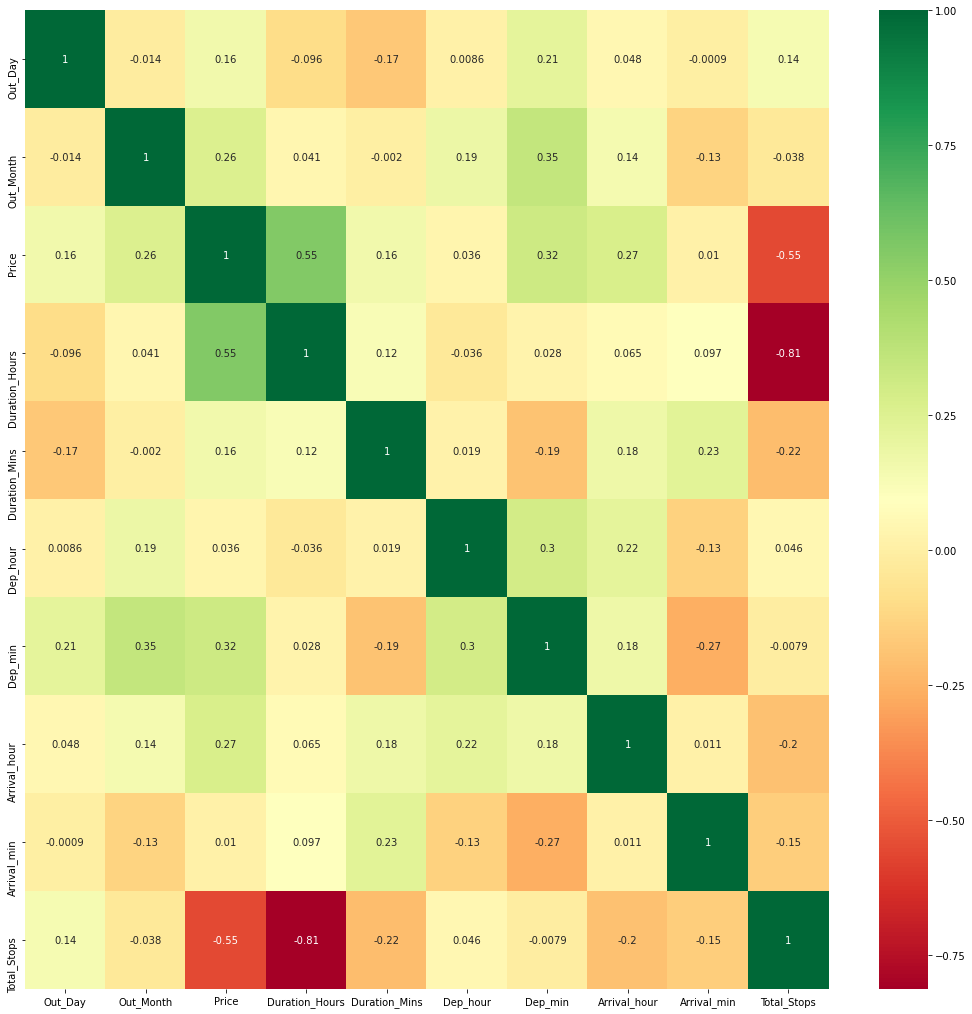

In [46]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

**Important Feature using ExtraTreesRegressor**

In [47]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [48]:
print(selection.feature_importances_)

[2.51603078e-02 2.85020204e-02 1.24148525e-01 8.70992123e-03
 5.10862571e-03 8.52478474e-03 9.04103508e-03 8.47115850e-03
 8.32186479e-02 5.41929323e-04 4.75046349e-04 5.54250608e-03
 2.68564422e-07 1.22864386e-02 3.09713930e-03 8.42593651e-04
 2.54692606e-03 2.99164077e-02 3.01847419e-03 7.25559226e-03
 6.49588840e-03 6.72506654e-03 2.29528081e-03 6.19995927e-03
 1.01881321e-03 1.90857106e-03 5.09148920e-01 1.90089963e-03
 7.05881379e-03 5.14401080e-04 7.79859219e-04 4.74124429e-04
 9.41225337e-03 4.12686439e-02 5.06923340e-03 4.46590198e-03
 9.11255881e-03 2.06522373e-03 6.34975310e-03 1.95122552e-03
 8.65205768e-03 7.24202654e-04]


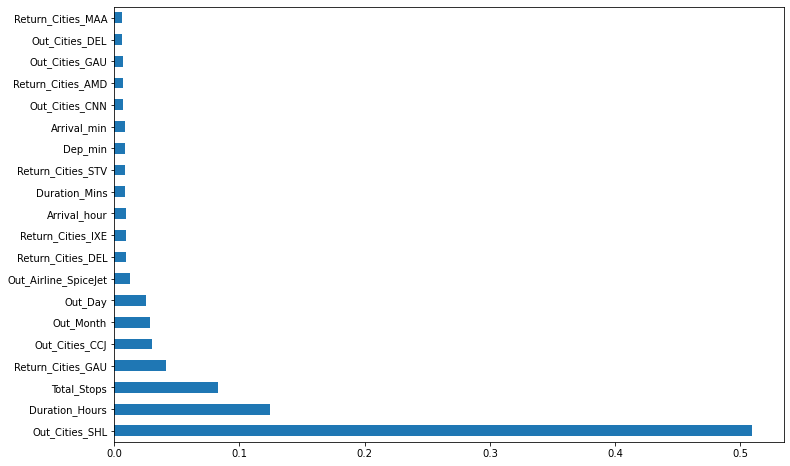

In [49]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#**Using train_test_split from sklearn.model_selection**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


**RandomForest**

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
#Prediction Now:

y_pred = reg_rf.predict(X_test)

In [53]:
print(y_pred)

[ 4973.25870847 11766.93911111  9732.30568326 13601.67345094
  7016.16477739  2585.32241342 11423.32815462 11412.20778788
 12806.86108294  9487.441001    3291.90166667  6495.0445
 10001.34819976 18796.          8546.47990055  7536.31192424
  8667.56055952  8998.43350794  4345.797149    9712.08751196
  6695.62        4973.25870847  8648.          6543.73033333
  6333.82        9487.441001   17512.35861322 10439.02428571
  9218.37222509  6748.80424603  8700.98029762  9894.93
  7853.8617767   6676.08716667 12989.98904762 10123.79989494
  8658.19816558  7454.46039791 13304.14445238 17689.25966667
  6611.82       12925.24095238 17631.         10900.77052747
  9521.02833333  8971.89866667 21265.03471429  6955.
  4345.797149    9521.02833333  8057.          9487.441001
  9487.441001    2736.62812305 10612.2346405  10437.124
  9487.441001   12934.83733333  9467.05162197 18796.
  2445.8476221   9732.30568326  9432.94439683 12237.5410689
  7853.8617767   9218.37222509  2585.32241342  6421.987857

In [54]:
reg_rf.score(X_train, y_train)

0.9846265990069389

In [55]:
reg_rf.score(X_test, y_test)

0.9454575022121879

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tabulate import tabulate

n = len(X_test)
k = X_test.shape[1]

R2_Score = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1 - R2_Score) * (n-1)/(n-k-1)
MAPE = mean_absolute_percentage_error(y_test, y_pred)*100
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("Metrics for RandomForestRegressor:")
print(tabulate([['RMSE', RMSE],['MSE', MSE],['MAPE', MAPE],['MAE', MAE],['R2_score', R2_Score],['Adj_R2', Adj_r2]], tablefmt = 'rst', numalign = 'left'))


Metrics for RandomForestRegressor:
========  ========
RMSE      948.46
MSE       899577
MAPE      6.14537
MAE       521.057
R2_score  0.945458
Adj_R2    0.935626
========  ========


**HyperParameter Tuning**


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [59]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [65]:
prediction = rf_random.predict(X_test)

C:\Users\aliwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


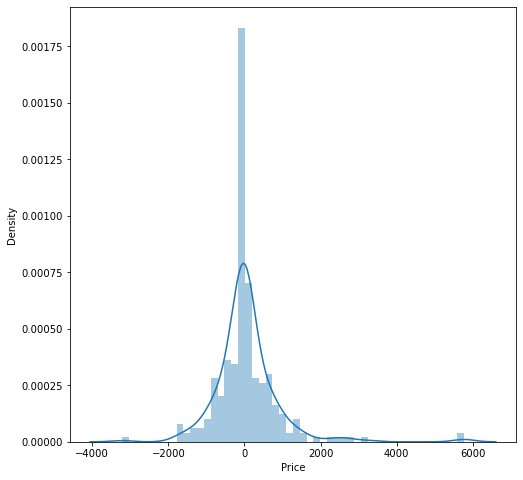

In [66]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

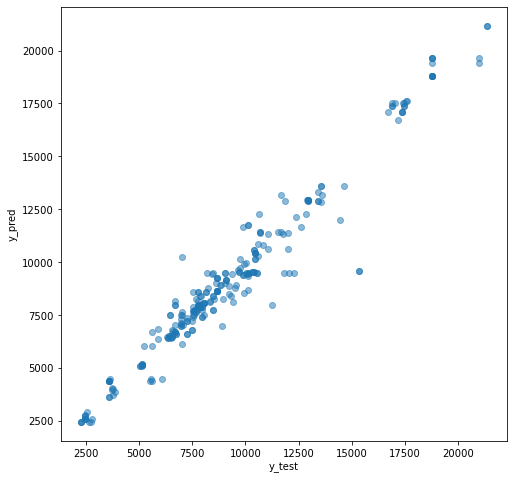

In [67]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [68]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('r2_score:', r2_score(y_test, y_pred))

MAE: 484.4192081659265
MSE: 740542.8396653546
RMSE: 860.5479880084285
r2_score: 0.9454575022121879


**SAVING THE PICKLE FILE TO REUSE*

In [77]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [78]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [79]:
y_prediction = forest.predict(X_test)

In [80]:
r2_score(y_test, y_prediction)

0.9454575022121879